In [2]:
import dill
dill.load_session('ch7ensemble.db')

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X , y = make_moons(n_samples = 100 , noise = 0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

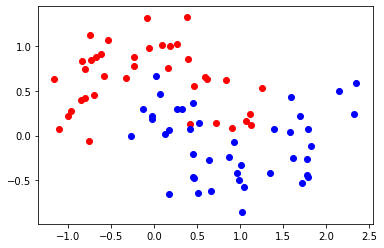

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='red')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='blue')
plt.show()

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(estimators=[('lr', log_clf),('rf', rnd_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [6]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

0.75
1.0
0.95
0.95


Bagging is with Replacement = Bootstrap is true <br/>
Bagging without Replacement = Pasting = Bootstrap is False

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, max_samples=10, bootstrap=True, n_jobs=-1,
                           oob_score=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

You can split the data using the oob function, and thereby get a test set and check the accuracy on the test set

In [20]:
bag_clf.oob_score_

0.7875

A Random Forest is basically a bagging classifier with Decision Trees which has been optimised for Decision Trees

In [23]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=10, max_leaf_nodes=2, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

You can also view the feature importances in a Random Forest

In [24]:
rnd_clf.feature_importances_

array([0.6, 0.4])

Boosting is where you have a number of weak learners combined to form a strong learner, by look at all the strengths of the weak learners by correcting its predecessors.

In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=10, algorithm="SAMME.R",
                            learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

A gradient boosted tree, also has some benefits unlike Ada which uses weights a GBT it tries to fit the prediction to the residual errors and then create the new predictors which it sums at the end. This can be used well for regression. <br/>
XGboost is extreme boosted gradient trees which does an even better job with early stopping and much more.

Last one is called Stacking which gets predictors and then aggregates their values using a blender, example if the predictors give 3.1, 2.7 and 2.9 the blender will return 3.0

In [28]:
import dill
dill.dump_session('ch7ensemble.db')